In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle
from scipy.interpolate import griddata

E:\anan\envs\Tensorflow-37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\anan\envs\Tensorflow-37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\anan\envs\Tensorflow-37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\anan\envs\Tensorflow-37\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarnin

# MET_forward

E:\anan\envs\Tensorflow-37\lib\site-packages\ipykernel_launcher.py:66: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
E:\anan\envs\Tensorflow-37\lib\site-packages\ipykernel_launcher.py:76: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.


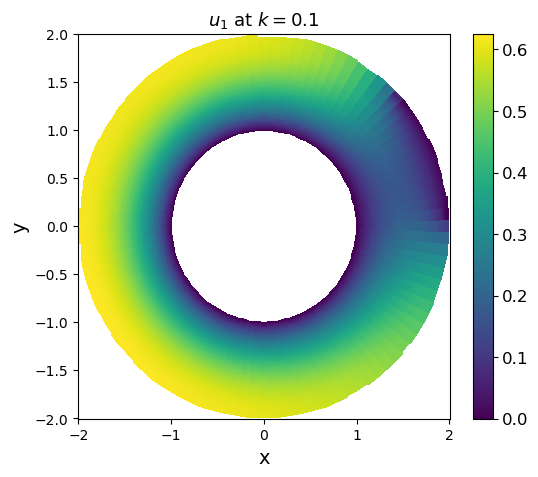

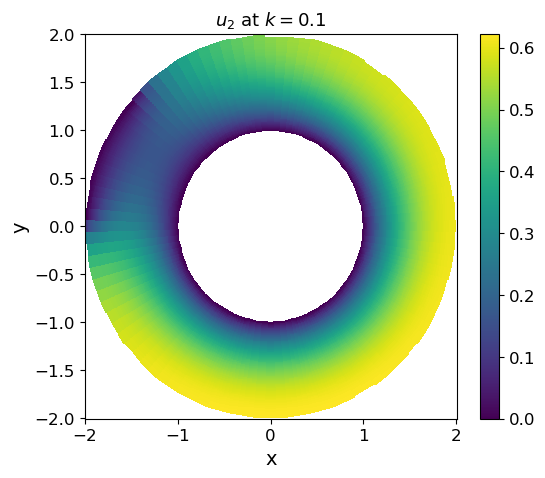

In [3]:
def neural_net(X, weights, biases):
    num_layers = len(weights) + 1
    H = X
    for l in range(0, num_layers - 2):
        W = weights[l]
        b = biases[l]
        H = tf.nn.tanh(tf.add(tf.matmul(H, W), b))
    W = weights[-1]
    b = biases[-1]
    Y = tf.add(tf.matmul(H, W), b)
    return Y

def net_u(x, y, weights, biases):
    xy = tf.concat([x, y], 1)
    u = neural_net(xy, weights, biases)
    u1, u2 = tf.split(u, 2, axis=1)
    return u1, u2

file_name = r"D:\new\code\2gate\2gate_slum\k0.1\met_forward_weight_random\metforward_hyper_best_model_random.pkl"
with open(file_name, "rb") as open_file:
    sample_list = pickle.load(open_file)
weights_u_np = sample_list["weights_u"]
biases_u_np = sample_list["biases_u"]

X_tf = tf.placeholder(tf.float64, shape=[None, 1])
Y_tf = tf.placeholder(tf.float64, shape=[None, 1])

weights_u = [tf.Variable(w, dtype=tf.float64) for w in weights_u_np]
biases_u = [tf.Variable(b, dtype=tf.float64) for b in biases_u_np]

u1_pred, u2_pred = net_u(X_tf, Y_tf, weights_u, biases_u)


n_points = 101
r1, r2 = 1, 2
theta = np.linspace(0, 2 * np.pi, n_points)
r_vals = np.linspace(r1, r2, n_points)
R, Theta = np.meshgrid(r_vals, theta)
X_test = R * np.cos(Theta)
Y_test = R * np.sin(Theta)
X_test_flat = X_test.reshape(-1, 1)
Y_test_flat = Y_test.reshape(-1, 1)


total_points = n_points * n_points
r_random = np.random.uniform(r1, r2, total_points)
theta_random = np.random.uniform(0, 2 * np.pi, total_points)
X_random = r_random * np.cos(theta_random)
Y_random = r_random * np.sin(theta_random)
X_random_flat = X_random[:, None]
Y_random_flat = Y_random[:, None]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    feed_dict = {X_tf: X_random_flat, Y_tf: Y_random_flat}
    ut0_u1_pred, ut0_u2_pred = sess.run([u1_pred, u2_pred], feed_dict=feed_dict)

u1_grid = griddata((X_random, Y_random), ut0_u1_pred.flatten(), (X_test, Y_test), method='cubic')
u2_grid = griddata((X_random, Y_random), ut0_u2_pred.flatten(), (X_test, Y_test), method='cubic')

# np.savetxt('101-ut1_random.txt', u1_grid)
# np.savetxt('101-ut2_random.txt', u2_grid)


plt.figure(figsize=(6, 5))
plt.pcolormesh(X_test, Y_test, u1_grid, cmap='viridis', vmin=0)
# plt.colorbar(label='Mean Escape Time')
cbar = plt.colorbar()  
cbar.ax.tick_params(labelsize=12)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.title(r'$u_{1}$ at $k=0.1$', fontsize=13)
# plt.savefig('2gate_met_forward_k0.1_u1.png')

plt.figure(figsize=(6, 5))
plt.pcolormesh(X_test, Y_test, u2_grid, cmap='viridis', vmin=0)
cbar = plt.colorbar()  
cbar.ax.tick_params(labelsize=12)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.title(r'$u_{2}$ at $k=0.1$', fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=12)
# plt.savefig('2gate_met_forward_k0.1_u2.png')

# MET_inverse_parak

## k=0.9decay

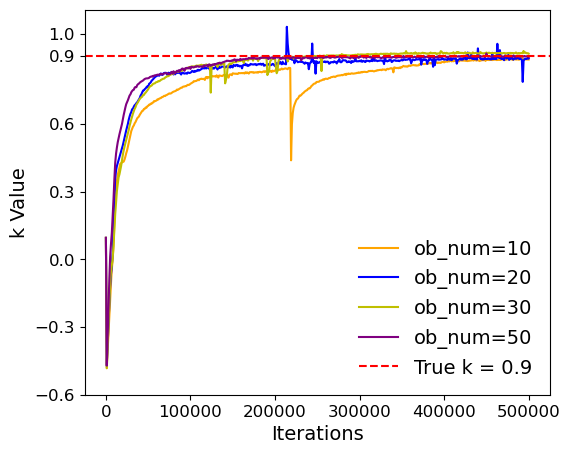

In [5]:
para1_history_decay=np.loadtxt(r"D:\new\code\2gate\2gate_slum\k0.9\inverse\decay\param_recorddecay5e3-10ep50w_random_ran_duiqi_300dounda.txt")
para2_history_decay=np.loadtxt(r"D:\new\code\2gate\2gate_slum\k0.9\inverse\decay\param_recorddecay5e3-20ep50w_random_ran_duiqi_300dounda.txt")
para3_history_decay=np.loadtxt(r"D:\new\code\2gate\2gate_slum\k0.9\inverse\decay\param_recorddecay5e3-50ep50w_random_ran_duiqi_300dounda.txt")
para4_history_decay=np.loadtxt(r"D:\new\code\2gate\2gate_slum\k0.9\inverse\decay\param_recorddecay5e3-100ep50w_random_ran_duiqi_300dounda.txt")

iterations_decay = list(range(0, len(para1_history_decay) * 1000, 1000))
plt.figure(figsize=(6, 5))
plt.plot(iterations_decay, para1_history_decay,label='ob_num=10', color='orange')
plt.plot(iterations_decay, para2_history_decay, label='ob_num=20', color='b')
plt.plot(iterations_decay, para3_history_decay, label='ob_num=30', color='y')
plt.plot(iterations_decay, para4_history_decay, label='ob_num=50', color='purple')
plt.axhline(y=0.9, color='r', linestyle='--', label='True k = 0.9')  # 真值
yticks_values = [-0.6, -0.3, 0.0, 0.3, 0.6, 0.9, 1.0]
plt.yticks(yticks_values)
plt.xlabel('Iterations',fontsize=14)
plt.ylabel('k Value',fontsize=14)
plt.legend(frameon=False,fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)


## k=0.9nondecay

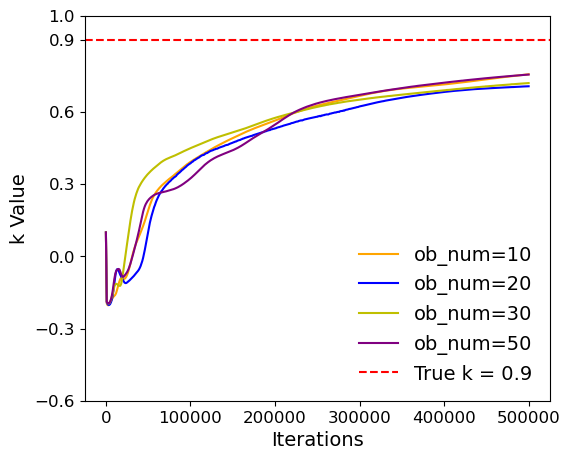

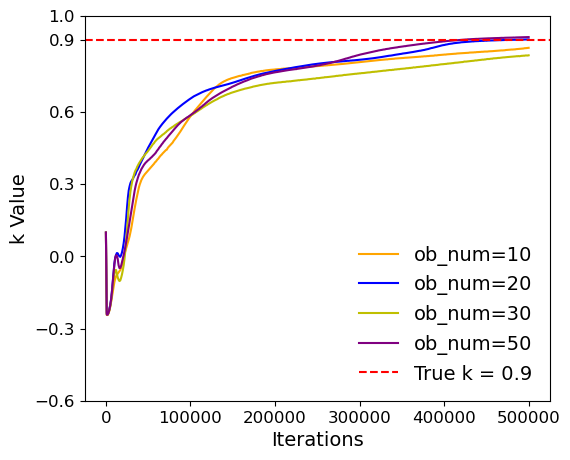

In [7]:
##lr=5e-4
para1_history54=np.loadtxt(r"D:\new\code\2gate\2gate_slum\k0.9\inverse\nondecay\para1_record_5e4-10ep50w_random_ran_duiqi_300dounda.txt")
para2_history54=np.loadtxt(r"D:\new\code\2gate\2gate_slum\k0.9\inverse\nondecay\para1_record_5e4-20ep50w_random_ran_duiqi_300dounda.txt")
para3_history54=np.loadtxt(r"D:\new\code\2gate\2gate_slum\k0.9\inverse\nondecay\para1_record_5e4-30ep50w_random_ran_duiqi_300dounda.txt")
para4_history54=np.loadtxt(r"D:\new\code\2gate\2gate_slum\k0.9\inverse\nondecay\para1_record_5e4-50ep50w_random_ran_duiqi_300dounda.txt")

iterations = list(range(0, len(para1_history54) * 1000, 1000))
plt.figure(figsize=(6, 5))
plt.plot(iterations, para1_history54, label='ob_num=10', color='orange')
plt.plot(iterations, para2_history54, label='ob_num=20', color='b')
plt.plot(iterations, para3_history54, label='ob_num=30', color='y')
plt.plot(iterations, para4_history54, label='ob_num=50', color='purple')
plt.axhline(y=0.9, color='r', linestyle='--', label='True k = 0.9') 

yticks_values = [-0.6, -0.3, 0.0, 0.3, 0.6, 0.9, 1.0]
plt.yticks(yticks_values)
plt.xlabel('Iterations',fontsize=14)
plt.ylabel('k Value',fontsize=14)
plt.legend(frameon=False,fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)


##lr=1e-3
para1_history13=np.loadtxt(r"D:\new\code\2gate\2gate_slum\k0.9\inverse\nondecay\para1_record_1e-3-10ep50w_random_ran_duiqi_300dounda.txt")
para2_history13=np.loadtxt(r"D:\new\code\2gate\2gate_slum\k0.9\inverse\nondecay\para1_record_1e-3-20ep50w_random_ran_duiqi_300dounda.txt")
para3_history13=np.loadtxt(r"D:\new\code\2gate\2gate_slum\k0.9\inverse\nondecay\para1_record_1e-3-30ep50w_random_ran_duiqi_300dounda.txt")
para4_history13=np.loadtxt(r"D:\new\code\2gate\2gate_slum\k0.9\inverse\nondecay\para1_record_1e-3-50ep50w_random_ran_duiqi_300dounda.txt")

iterations = list(range(0, len(para1_history13) * 1000, 1000))
plt.figure(figsize=(6, 5))
plt.plot(iterations, para1_history13, label='ob_num=10', color='orange')
plt.plot(iterations, para2_history13, label='ob_num=20', color='b')
plt.plot(iterations, para3_history13, label='ob_num=30', color='y')
plt.plot(iterations, para4_history13, label='ob_num=50', color='purple')
plt.axhline(y=0.9, color='r', linestyle='--', label='True k = 0.9') 
yticks_values = [-0.6, -0.3, 0.0, 0.3, 0.6, 0.9, 1.0]
plt.yticks(yticks_values)

plt.xlabel('Iterations',fontsize=14)
plt.ylabel('k Value',fontsize=14)
plt.legend(frameon=False,fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)